# Python Homework 5

**Release date:** Saturday, February 15 <br>
**Due date:** Friday, February 28, 11:59 p.m. via GauchoSpace

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename "PythonHW5_YOURPERMNUMBER.ipynb".

__Background:__ The purpose of this python homework is to explore the so-called __Arcsine Laws__ numerically. They describe a number of interesting results by relating path properties of the simple symmetric random walk to the __arcsine distribution__ (see also __Lecture 12__!!).

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, we define the following random variables:
* The total number of periods from $0$ to $2N$ the random walk spends above zero: 

$$C_{2N}= \vert \{ n \in \{ 1,\dots , 2N \} : S_n > 0 \}\vert. $$

* The time of the last visit to $0$ before time $2N$: 

$$L_{2N} = \max \{ 0 \leq n \leq  2N : S_n = 0 \}.$$

* The time when the random walk reaches its maximum value between time $0$ and $2N$: 

$$M_{2N} = \operatorname{argmax} \{ S_n : 0 \leq n \leq 2N \}.$$ 

As usual, we start with loading some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine

## Problem 1 (2 Points)

1. Write a function <tt>randomWalk(...)</tt> which simulates one <i>path</i> (or <i>trajectory</i>) of a simple symmetric random walk with 2N time steps (i.e. from 0,1,2,...,2N) starting at $S_0=0$.

Input: 
* <tt>lengthOfRandomWalk = 2N</tt> 

Output:
* <tt>samplePath</tt>: Array of length 2N+1 with the entire path of the random walk on 0,1,2,...,2N


In [2]:
def randomWalk(lengthOfRandomWalk):
    samplePath = np.zeros(lengthOfRandomWalk+1)
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE np.random.choice() TO SIMULATE THE INCREMENTS
    samplePath[0] = 0
    for i in range(lengthOfRandomWalk):
        samplePath[i+1] = samplePath[i] + np.random.choice([-1,1], 1)
    
    return samplePath

In [3]:
## TEST YOUR FUNCTION HERE
print(randomWalk(100))

[ 0. -1. -2. -3. -4. -5. -4. -3. -4. -5. -6. -5. -6. -7. -6. -7. -6. -5.
 -6. -5. -6. -5. -4. -5. -6. -5. -4. -3. -4. -3. -4. -3. -2. -3. -4. -5.
 -4. -3. -2. -1. -2. -1.  0. -1.  0. -1.  0. -1. -2. -3. -2. -3. -4. -3.
 -4. -3. -4. -3. -2. -3. -4. -3. -4. -3. -4. -3. -2. -1.  0.  1.  2.  1.
  0. -1. -2. -1.  0.  1.  2.  3.  2.  3.  4.  5.  4.  3.  2.  1.  2.  1.
  0.  1.  2.  1.  2.  3.  2.  1.  0. -1.  0.]


2. Plot the trajectory of the random walk you simulated in 1.)

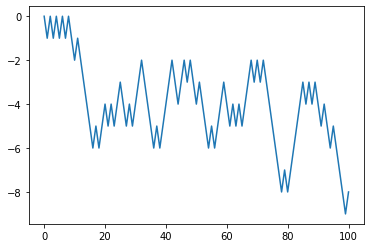

In [4]:
## WRITE YOUR OWN CODE HERE
plt.plot(randomWalk(100))

## Problem 2 (6 points)

Write __three__ functions which take a path (= realization) of the random walk as an input and then compute a value (= realization) of the random variables $C_{2N}, L_{2N}, M_{2N}$, respectively, as defined above.

__1. Function:__ <tt>timeAboveZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $C_{2N}$

In [5]:
def timeAboveZero(path):
    result = 0
    for i in range(len(path)):
        if((path[i]) > 0):
            result = result+1
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.sum() AND A LOGICAL OPERATION

    return result

In [6]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
timeAboveZero(path)

[ 0.  1.  0. -1.  0.  1.  2.  3.  2.  1.  2.  1.  0.  1.  2.  1.  0. -1.
  0. -1.  0.]


11

__2. Function:__ <tt>TimeOfLastVisitOfZero(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $L_{2N}$

In [7]:
def TimeOfLastVisitOfZero(path):
    
    ## WRITE YOUR OWN CODE HERE
    ## HINT: USE numpy.where() AND numpy.amax()
    lastVisit = 0
    for i in range(len(path)):
        if(path[i] == 0):
            lastVisit = i
    return lastVisit  

In [8]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
TimeOfLastVisitOfZero(path)

[ 0. -1.  0.  1.  2.  1.  2.  1.  0.  1.  2.  1.  0. -1. -2. -3. -2. -3.
 -2. -1. -2.]


12

__3. Function:__ <tt>timeHitMax(...)</tt>

Input: 
* <tt>path</tt>: Realization of the random walk from the function <tt>randomWalk(2N)</tt> 

Output:
* <tt>result</tt>: Realization of the random variable $M_{2N}$

In [9]:
def timeHitMax(randomWalk):
    maxTime = 0
    max = 0
    for i in range(len(randomWalk)):
        if(randomWalk[i]> max):
            max = randomWalk[i]
            maxTime = i
        
    result = maxTime
    return result 

In [10]:
## TEST YOUR FUNCTION HERE
path = randomWalk(20)
print(path)
timeHitMax(path)

[0. 1. 2. 1. 0. 1. 2. 3. 4. 3. 4. 3. 2. 3. 4. 3. 2. 3. 4. 5. 6.]


20

## Problem 3 (2 Points)

Random Walk theory provides us with the following interesting asymptotic statements (cf. __Lecture 12__):

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{C_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{L_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{M_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

We say that the random variables $C_{2N}/2N, L_{2N}/2N, M_{2N}/2N$ <b>converge in distribution</b> to the Arcsine Distribution.

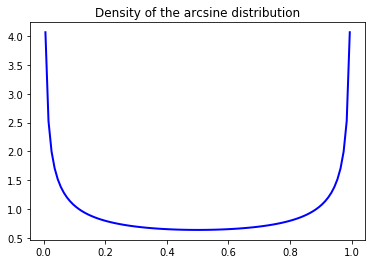

In [15]:
## A PLOT OF THE ARCSINE DENSITY
x = np.linspace(arcsine.ppf(0.05), arcsine.ppf(0.95), 100)
plt.title("Density of the arcsine distribution")
plt.plot(x, arcsine.pdf(x), linewidth=2, color='b')
plt.show()

For $2N = 1000$ sample 10,000 realizations of each of the random variables $C_{2N}/2N, L_{2N}/2N,$ and $M_{2N}/2N$, respectively by using your functions above. Display a normalized histogram for all three simulations, along with the probability density function of the arcsine distribution, to check the above facts numerically! 

In [16]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!


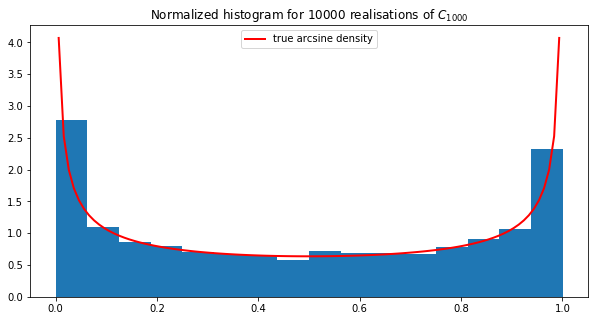

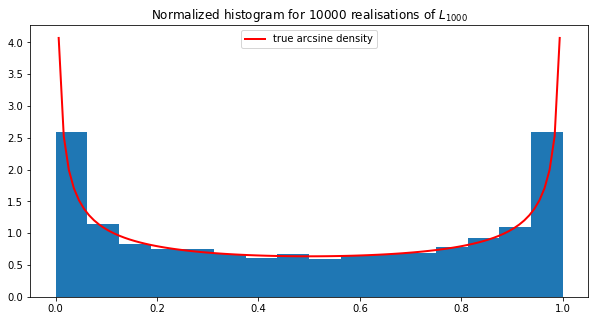

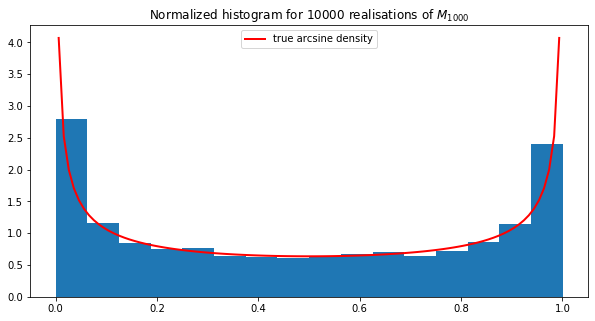

In [20]:
# COMPLETE/MODIFY THE PLOT COMMANDS ACCORDINGLY

N = 500
M = 10000

path = randomWalk(N*2+1)
answer =np.zeros(10000)
for i in range(len(answer)):
    path = randomWalk(N*2+1)
    answer[i] = timeAboveZero(path)/(2*N)
c = answer  # This has to be replaced by the simulated values for C_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $C_{1000}$")
plt.hist(c, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

answer2 =np.zeros(10000)
for i in range(len(answer2)):
    path = randomWalk(N*2+1)
    answer2[i] = TimeOfLastVisitOfZero(path)/(2*N)
l = answer2  # This has to be replaced by the corresponding simulated values for L_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $L_{1000}$")
plt.hist(l, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

answer3 =np.zeros(10000)
for i in range(len(answer3)):
    path = randomWalk(N*2+1)
    answer3[i] = timeHitMax(path)/(2*N)
m = answer3 # This has to be replaced by the corresponding simulated values for M_2N !!!

plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10000 realisations of $M_{1000}$")
plt.hist(m, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

plt.show()